# 基于逻辑回归的非线性分类预测实验
本实验将演示如何使用逻辑回归模型解决非线性分类问题，包括多项式特征生成、正则项设置、模型训练、评估及可视化。

## 1. 读取数据
数据集文件名为 `ex2data2.txt`，位于当前目录。

In [10]:
import pandas as pd
data = pd.read_csv('ex2data2.txt',header=None, names = ('x1','x2','y'))
# 查看数据维度
data.shape

(118, 3)

## 2. 描述性分析与可视化分析

In [11]:
# 查看数据的随机五项
data.sample(5)

,x1,x2,y
75,0.51786,-0.594300,0
39,0.22984,-0.411550,1
34,-0.36348,0.312130,1
117,0.63265,-0.030612,0
91,-0.54781,0.706870,0


In [12]:
# 查看数据缺失值
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

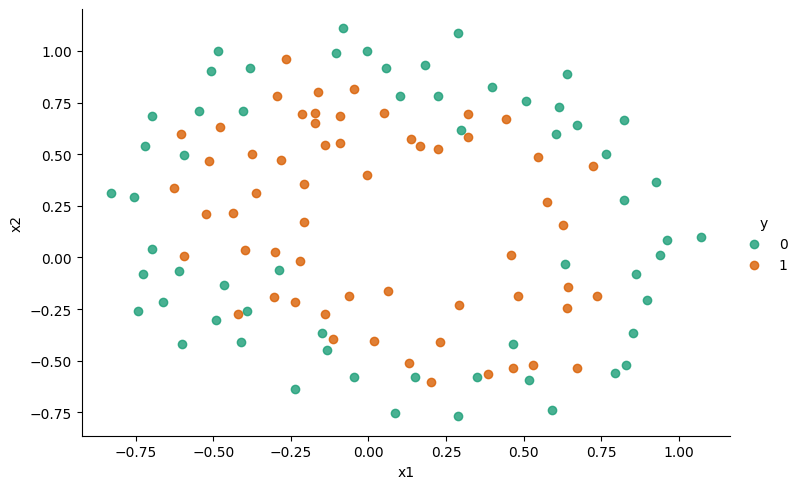

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot(x='x1', y='x2', hue='y', data=data, fit_reg=False, palette='Dark2', aspect=1.5)
plt.show()

## 3. 数据预处理

In [14]:
# 提取特征和标签
X = data[['x1', 'x2']].values
y = data['y'].values

from sklearn.preprocessing import PolynomialFeatures

# 生成多项式特征
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)
print(f"多项式特征 shape: {X_poly.shape}")

多项式特征 shape: (118, 28)


## 4. 建立逻辑回归模型

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# 建立逻辑回归模型
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

print(f"训练集得分: {model.score(X_train, y_train):.4f}")
print(f"测试集得分: {model.score(X_test, y_test):.4f}")

训练集得分: 0.8171
测试集得分: 0.7500


## 5. 可视化决策边界

C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20915 (\N{CJK UNIFIED IDEOGRAPH-51B3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36793 (\N{CJK UNIFIED IDEOGRAPH-8FB9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra

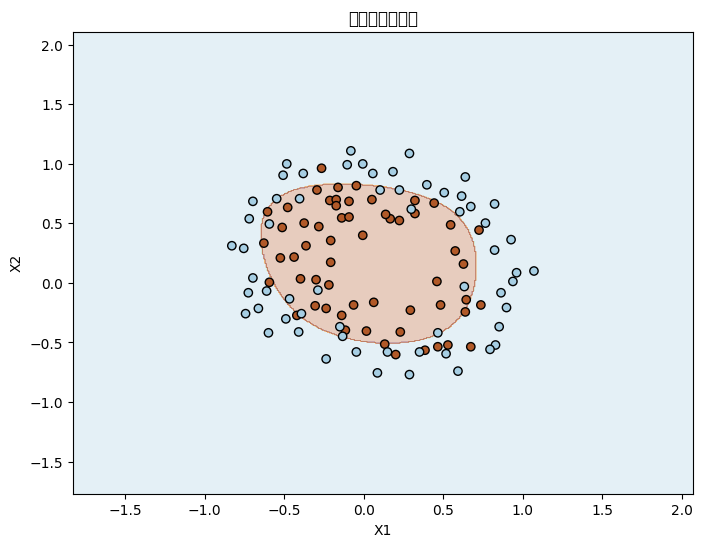

In [16]:
import numpy as np

def plot_decision_boundary(model, poly, X, y):
    # 绘制决策边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = poly.transform(grid)
    probs = model.predict(grid_poly).reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, probs, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('决策边界可视化')
    plt.show()

# 调用可视化函数
plot_decision_boundary(model, poly, X, y)

## 6. 实验结论

通过多项式特征扩展和逻辑回归模型，可以有效实现非线性分类。决策边界的可视化展示了模型对复杂数据分布的拟合能力。